In [18]:
%matplotlib inline
from glob import glob
import re
import networkx as nx
import matplotlib.pyplot as plt

In [19]:
def get_deps():
    deps = {}
    modules = glob('*.js')
    for module in modules:
        if 'test_' in module:
            continue
        s = open(module).read()
        deps[module[:-3]] = re.findall(r'''require[(]["'][.]?[//]?(\w+)[.]?j?s?''', s)
    return deps

deps = get_deps()

['compile', 'run', 'bytecoderun', 'builtins', 'parse', 'stdlib', 'deepCopy', 'Immutable']


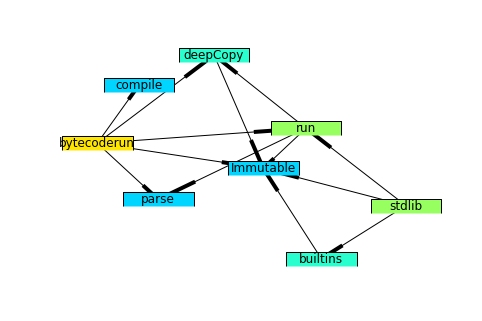

In [53]:
G = nx.DiGraph()
G.add_edges_from([(module, dep)
                  for module in deps.keys()
                  for dep in deps[module]])
print G.nodes()


pos = nx.spring_layout(G, iterations=500)
nx.draw(G, pos, with_labels=True, node_size=5000, scale=10,
        node_shape=[(-1, -.2), (-1, .2), (1, .2), (1, -.2)],
        node_color=[len(deps[n]) for n in G.nodes()],
        vmin=-5, vmax=10)
plt.show()
